In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
x=df.drop('Gender',axis=1)
y=df['Gender']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state=40)

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
xtrain = scale.fit_transform(xtrain)
xtest = scale.transform(xtest)

In [26]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
pred

array(['Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
      

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
confmat = confusion_matrix(ytest,pred)
confmat

array([[26, 32],
       [35, 27]], dtype=int64)

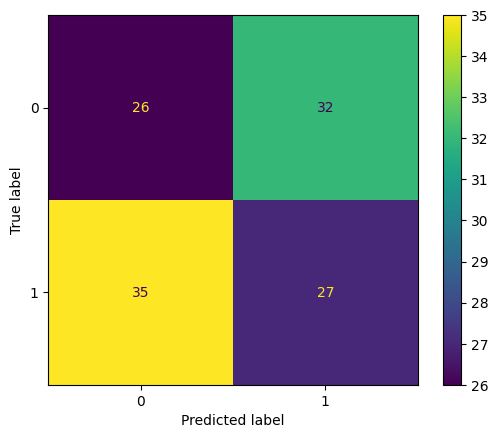

In [29]:
confatd = ConfusionMatrixDisplay(confusion_matrix=confmat)
confatd.plot()
plt.show()

In [30]:
tp=confmat[0][0]
fp=confmat[0][1]
fn=confmat[1][0]
tn=confmat[1][1]

print('Accuracy: ', (tp+fp)/(tp+fp+tn+fn))
print('Error: ', (fp+fn)/(tp+tn+fp+fn))
print('Precision: ', (tp)/(tp+fp))
print('Recall: ', (tp)/(tp+fn))

Accuracy:  0.48333333333333334
Error:  0.5583333333333333
Precision:  0.4482758620689655
Recall:  0.4262295081967213
